### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import acquire
from prepare import prep_titanic
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# acquire the dataframe 

In [3]:
df = acquire.get_titanic_data()

Using cached csv


In [4]:
# prepare the data

In [5]:
# split the data

In [6]:
train, validate, test = prep_titanic(df)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 583 to 553
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  497 non-null    int64  
 1   survived      497 non-null    int64  
 2   pclass        497 non-null    int64  
 3   sex           497 non-null    int64  
 4   age           497 non-null    float64
 5   sibsp         497 non-null    int64  
 6   parch         497 non-null    int64  
 7   fare          497 non-null    float64
 8   embarked      497 non-null    object 
 9   class         497 non-null    object 
 10  embark_town   497 non-null    object 
 11  alone         497 non-null    int64  
 12  Q             497 non-null    uint8  
 13  S             497 non-null    uint8  
dtypes: float64(2), int64(7), object(3), uint8(2)
memory usage: 51.4+ KB


In [8]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
583,583,0,1,1,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,0,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,1,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,0,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,0,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0


In [9]:
# split our X and y's:
X_train, y_train = train.drop(columns='survived'), train['survived']
X_val, y_val = validate.drop(columns='survived'), validate['survived']

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 583 to 553
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  497 non-null    int64  
 1   pclass        497 non-null    int64  
 2   sex           497 non-null    int64  
 3   age           497 non-null    float64
 4   sibsp         497 non-null    int64  
 5   parch         497 non-null    int64  
 6   fare          497 non-null    float64
 7   embarked      497 non-null    object 
 8   class         497 non-null    object 
 9   embark_town   497 non-null    object 
 10  alone         497 non-null    int64  
 11  Q             497 non-null    uint8  
 12  S             497 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(2)
memory usage: 47.6+ KB


In [11]:
# make our model

In [12]:
clf = KNeighborsClassifier()

In [13]:
# fit the model

In [14]:
# We are selecting two of the top features that we observed from exploratory data analysis for fitting: pclass and sex

In [15]:
clf.fit(X_train[['sex', 'pclass']], y_train)

KNeighborsClassifier()

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 583 to 553
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  497 non-null    int64  
 1   pclass        497 non-null    int64  
 2   sex           497 non-null    int64  
 3   age           497 non-null    float64
 4   sibsp         497 non-null    int64  
 5   parch         497 non-null    int64  
 6   fare          497 non-null    float64
 7   embarked      497 non-null    object 
 8   class         497 non-null    object 
 9   embark_town   497 non-null    object 
 10  alone         497 non-null    int64  
 11  Q             497 non-null    uint8  
 12  S             497 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(2)
memory usage: 47.6+ KB


In [17]:
X_train.columns

Index(['passenger_id', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'embark_town', 'alone', 'Q', 'S'],
      dtype='object')

In [18]:
# make our predictiosn from the model:
y_pred = clf.predict(X_train[['sex', 'pclass']])

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [19]:
from eval import get_metrics_bin

In [20]:
class_report = get_metrics_bin(clf, X_train[['sex', 'pclass']], y_train)


    The accuracy for our model is 0.7907
    The True Positive Rate is 0.474, The False Positive Rate is 0.013,
    The True Negative Rate is 0.987, and the False Negative Rate is 0.526
    


3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [21]:
class_report

,precision,recall,f1-score,support
0,0.751861,0.986971,0.853521,307.000000
1,0.957447,0.473684,0.633803,190.000000
accuracy,0.790744,0.790744,0.790744,0.790744
macro avg,0.854654,0.730327,0.743662,497.000000
weighted avg,0.830455,0.790744,0.769524,497.000000


### 4. Run through steps 1-3 setting k to 10

In [22]:
dropcols = ['embarked','class','embark_town']

In [23]:
X_train.head(2)

,passenger_id,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
583,583,1,1,36.0,0,0,40.125,C,First,Cherbourg,1,0,0
337,337,1,0,41.0,0,0,134.500,C,First,Cherbourg,1,0,0


In [24]:
# make the thing:
clf1 = KNeighborsClassifier(n_neighbors=10)

In [25]:
# fit the thing
clf1.fit(X_train.drop(columns=dropcols), y_train)

KNeighborsClassifier(n_neighbors=10)

In [26]:
# use the thing
y_pred_1 = clf1.predict(X_train.drop(columns=dropcols))

In [27]:
# analyze the thing
class_report1 = get_metrics_bin(clf1, X_train.drop(columns=dropcols), y_train)


    The accuracy for our model is 0.7022
    The True Positive Rate is 0.347, The False Positive Rate is 0.0782,
    The True Negative Rate is 0.922, and the False Negative Rate is 0.653
    


### 5. Run through setps 1-3 setting k to 20

In [28]:
clf2 = KNeighborsClassifier(n_neighbors=20)
clf2.fit(X_train.drop(columns=dropcols), y_train)
y_pred_2 = clf2.predict(X_train.drop(columns=dropcols))
class_report2 = get_metrics_bin(clf2, X_train.drop(columns=dropcols), y_train)


    The accuracy for our model is 0.6801
    The True Positive Rate is 0.258, The False Positive Rate is 0.0586,
    The True Negative Rate is 0.941, and the False Negative Rate is 0.742
    


In [29]:
class_report1

,precision,recall,f1-score,support
0,0.695332,0.921824,0.792717,307.000000
1,0.733333,0.347368,0.471429,190.000000
accuracy,0.702213,0.702213,0.702213,0.702213
macro avg,0.714333,0.634596,0.632073,497.000000
weighted avg,0.709859,0.702213,0.669890,497.000000


In [30]:
class_report2

,precision,recall,f1-score,support
0,0.672093,0.941368,0.784261,307.00000
1,0.731343,0.257895,0.381323,190.00000
accuracy,0.680080,0.680080,0.680080,0.68008
macro avg,0.701718,0.599631,0.582792,497.00000
weighted avg,0.694744,0.680080,0.630220,497.00000


6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [31]:
# make a key for reference
rubric_df = pd.DataFrame([['true negative', 'false positive'],['false negative', 'true positive']], columns=['predict_death', 'predict_survive'], index=['actual_death', 'actual_survive'])

In [32]:
rubric_df

,predict_death,predict_survive
actual_death,true negative,false positive
actual_survive,false negative,true positive


7. Which model performs best on our out-of-sample data from validate?

In [33]:
pred_val = clf.predict(X_val[['sex', 'pclass']])
pred_val1 = clf1.predict(X_val.drop(columns=dropcols))
pred_val2 = clf2.predict(X_val.drop(columns=dropcols))

In [35]:
class_report_val = get_metrics_bin(clf, X_val[['sex', 'pclass']], y_val)
class_report_val1 = get_metrics_bin(clf1, X_val.drop(columns=dropcols), y_val)
class_report_val2 = get_metrics_bin(clf2, X_val.drop(columns=dropcols), y_val)


    The accuracy for our model is 0.7804
    The True Positive Rate is 0.476, The False Positive Rate is 0.0303,
    The True Negative Rate is 0.97, and the False Negative Rate is 0.524
    

    The accuracy for our model is 0.6916
    The True Positive Rate is 0.317, The False Positive Rate is 0.0758,
    The True Negative Rate is 0.924, and the False Negative Rate is 0.683
    

    The accuracy for our model is 0.7009
    The True Positive Rate is 0.305, The False Positive Rate is 0.053,
    The True Negative Rate is 0.947, and the False Negative Rate is 0.695
    


In [36]:
class_report_val

,precision,recall,f1-score,support
0,0.748538,0.969697,0.844884,132.000000
1,0.906977,0.475610,0.624000,82.000000
accuracy,0.780374,0.780374,0.780374,0.780374
macro avg,0.827757,0.722653,0.734442,214.000000
weighted avg,0.809248,0.780374,0.760247,214.000000


In [37]:
class_report_val1

,precision,recall,f1-score,support
0,0.685393,0.924242,0.787097,132.000000
1,0.722222,0.317073,0.440678,82.000000
accuracy,0.691589,0.691589,0.691589,0.691589
macro avg,0.703808,0.620658,0.613887,214.000000
weighted avg,0.699505,0.691589,0.654357,214.000000


In [38]:
class_report_val2

,precision,recall,f1-score,support
0,0.686813,0.946970,0.796178,132.000000
1,0.781250,0.304878,0.438596,82.000000
accuracy,0.700935,0.700935,0.700935,0.700935
macro avg,0.734032,0.625924,0.617387,214.000000
weighted avg,0.722999,0.700935,0.659161,214.000000


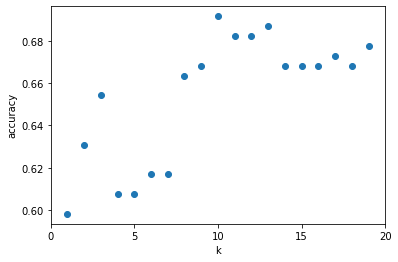

In [41]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train.drop(columns=dropcols), y_train)
    scores.append(knn.score(X_val.drop(columns=dropcols), y_val))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()